In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/envs/dlcv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/dlcv/sb/c07-first_image_classifier'

In [3]:
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))

In [4]:
from pyimagesearch.nn.conv import ShallowNet

In [6]:
print("[INFO] Loading CIFAR-10 data...")
from keras.datasets import cifar10
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

[INFO] Loading CIFAR-10 data...


In [7]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [8]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

In [9]:
print("[INFO] Compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] Compiling model...


In [11]:
print("[INFO] Train the model...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] Train the model...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 46s 912us/step - loss: 1.7899 - acc: 0.3746 - val_loss: 1.6299 - val_acc: 0.4306
Epoch 2/40
50000/50000 [==============================] - 47s 936us/step - loss: 1.5450 - acc: 0.4621 - val_loss: 1.4706 - val_acc: 0.4820
Epoch 3/40
50000/50000 [==============================] - 47s 945us/step - loss: 1.4216 - acc: 0.5040 - val_loss: 1.3676 - val_acc: 0.5189
Epoch 4/40
50000/50000 [==============================] - 46s 923us/step - loss: 1.3390 - acc: 0.5321 - val_loss: 1.3849 - val_acc: 0.4941
Epoch 5/40
50000/50000 [==============================] - 45s 895us/step - loss: 1.2738 - acc: 0.5532 - val_loss: 1.3398 - val_acc: 0.5238
Epoch 6/40
50000/50000 [==============================] - 44s 887us/step - loss: 1.2269 - acc: 0.5710 - val_loss: 1.3081 - val_acc: 0.5306
Epoch 7/40
50000/50000 [==============================] - 44s 888us/step - loss: 1.1895 - 

In [12]:
print("[INFO] Evaluating Network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] Evaluating Network...
             precision    recall  f1-score   support

   airplane       0.63      0.65      0.64      1000
 automobile       0.72      0.74      0.73      1000
       bird       0.58      0.32      0.41      1000
        cat       0.50      0.27      0.35      1000
       deer       0.51      0.62      0.56      1000
        dog       0.54      0.55      0.54      1000
       frog       0.68      0.74      0.71      1000
      horse       0.60      0.76      0.67      1000
       ship       0.65      0.80      0.72      1000
      truck       0.68      0.71      0.70      1000

avg / total       0.61      0.62      0.60     10000



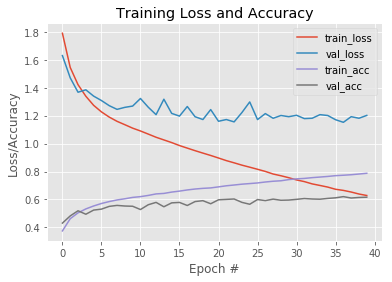

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()